                                              metric  \
0  {'__name__': 'probe_http_duration_seconds', 'i...   
1  {'__name__': 'probe_http_duration_seconds', 'i...   
2  {'__name__': 'probe_http_duration_seconds', 'i...   
3  {'__name__': 'probe_http_duration_seconds', 'i...   
4  {'__name__': 'probe_http_duration_seconds', 'i...   

                         value  
0  [1721303291.876, 0.0031797]  
1    [1721303291.876, 0.01669]  
2          [1721303291.876, 0]  
3  [1721303291.876, 0.0056787]  
4  [1721303291.876, 0.0005306]  
Average Response Time: 0.0052158 seconds
Anomaly Detection Results:
                                              metric     value  anomaly
0  {'__name__': 'probe_http_duration_seconds', 'i...  0.003180   Normal
1  {'__name__': 'probe_http_duration_seconds', 'i...  0.016690  Anomaly
2  {'__name__': 'probe_http_duration_seconds', 'i...  0.000000   Normal
3  {'__name__': 'probe_http_duration_seconds', 'i...  0.005679   Normal
4  {'__name__': 'probe_http_duration_

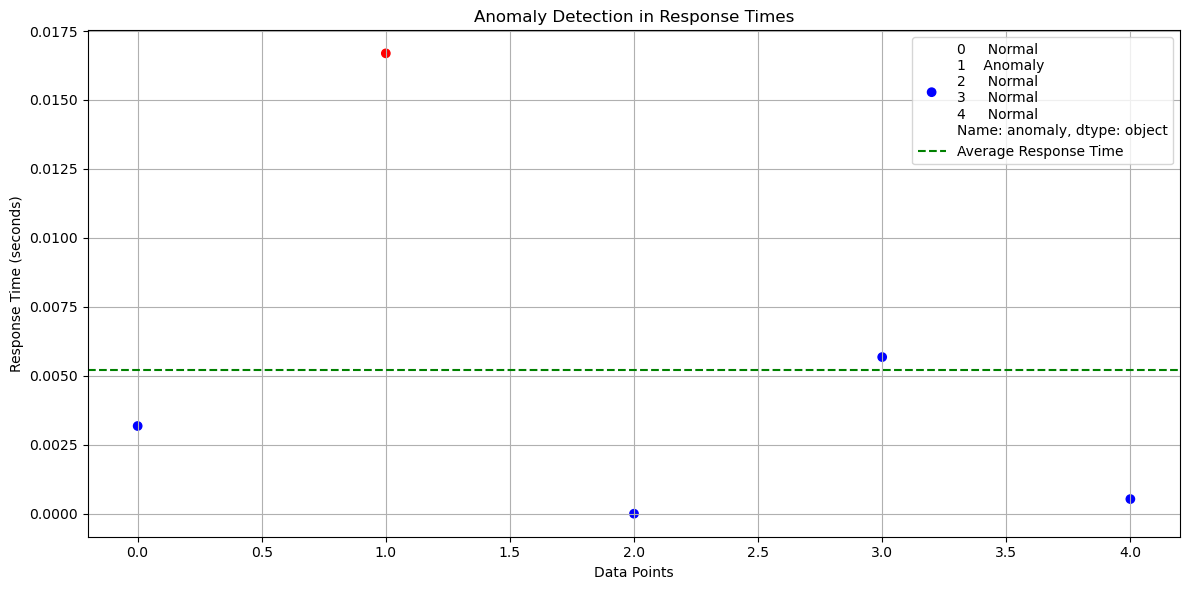

In [2]:
import requests
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to fetch metrics from Prometheus
def fetch_prometheus_metrics(query):
    url = 'http://localhost:9090/api/v1/query'
    params = {'query': query}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an exception for bad responses (e.g., 4xx, 5xx)
        data = response.json()
        return data['data']['result']
    except requests.exceptions.RequestException as e:
        print(f"Error fetching Prometheus data: {e}")
        return None
    except Exception as ex:
        print(f"Other error occurred: {ex}")
        return None

# Example query to fetch response times from Prometheus for an IP address
prometheus_query = 'probe_http_duration_seconds{instance="https://10.40.2.10"}'

# Fetching data from Prometheus
results = fetch_prometheus_metrics(prometheus_query)

if results:
    # Convert Prometheus results to a pandas DataFrame
    data = pd.DataFrame(results)
    print(data)
    # Extract numeric values from the 'value' column (assuming it's a list)
    data['value'] = data['value'].apply(lambda x: float(x[1]))  # Extract the second element from the list and convert to float

    # Example: Calculate average response time over a time window
    average_response_time = data['value'].mean()

    # Example: Detect anomalies using Isolation Forest
    X = data[['value']].values.reshape(-1, 1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train Isolation Forest model
    model = IsolationForest(contamination=0.05)  # Adjust contamination based on anomaly threshold
    model.fit(X_scaled)

    # Predict anomalies
    data['anomaly'] = model.predict(X_scaled)
    data['anomaly'] = data['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

    # Example: Print results
    print(f"Average Response Time: {average_response_time} seconds")
    print("Anomaly Detection Results:")
    print(data[['metric', 'value', 'anomaly']])

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.scatter(data.index, data['value'], c=data['anomaly'].map({'Normal': 'blue', 'Anomaly': 'red'}), label=data['anomaly'])
    plt.axhline(y=average_response_time, color='g', linestyle='--', label='Average Response Time')
    plt.title('Anomaly Detection in Response Times')
    plt.xlabel('Data Points')
    plt.ylabel('Response Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("No results fetched from Prometheus.")

                                              metric  \
0  {'__name__': 'probe_http_duration_seconds', 'i...   
1  {'__name__': 'probe_http_duration_seconds', 'i...   
2  {'__name__': 'probe_http_duration_seconds', 'i...   
3  {'__name__': 'probe_http_duration_seconds', 'i...   
4  {'__name__': 'probe_http_duration_seconds', 'i...   
5  {'__name__': 'probe_http_duration_seconds', 'i...   
6  {'__name__': 'probe_http_duration_seconds', 'i...   
7  {'__name__': 'probe_http_duration_seconds', 'i...   
8  {'__name__': 'probe_http_duration_seconds', 'i...   
9  {'__name__': 'probe_http_duration_seconds', 'i...   

                         value  
0  [1720171660.944, 0.0036917]  
1   [1720171660.944, 0.017841]  
2          [1720171660.944, 0]  
3  [1720171660.944, 0.0087883]  
4  [1720171660.944, 0.0035071]  
5  [1720171660.944, 0.0024884]  
6  [1720171660.944, 0.0158203]  
7          [1720171660.944, 0]  
8    [1720171660.944, 0.00623]  
9  [1720171660.944, 0.0025649]  
The best n_neighbors

C:\Users\bough\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


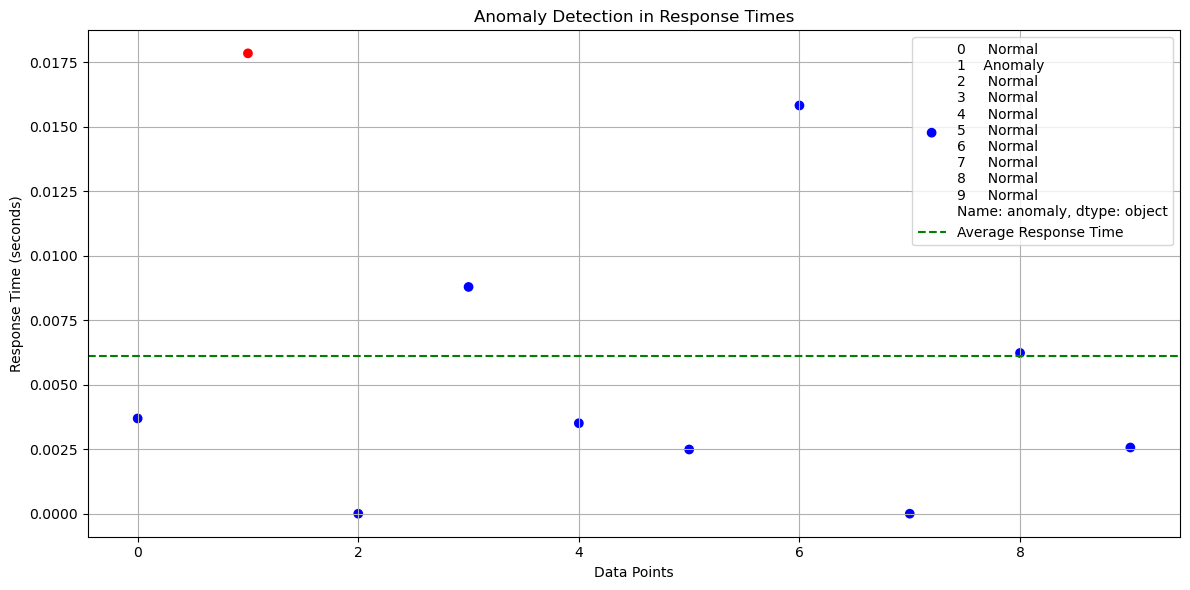

In [12]:
import requests
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Function to fetch metrics from Prometheus
def fetch_prometheus_metrics(query):
    url = 'http://localhost:9090/api/v1/query'
    params = {'query': query}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an exception for bad responses (e.g., 4xx, 5xx)
        data = response.json()
        return data['data']['result']
    except requests.exceptions.RequestException as e:
        print(f"Error fetching Prometheus data: {e}")
        return None
    except Exception as ex:
        print(f"Other error occurred: {ex}")
        return None

# Example query to fetch response times from Prometheus for an IP address
prometheus_query = 'probe_http_duration_seconds{instance="https://10.40.2.102"}'

# Fetching data from Prometheus
results = fetch_prometheus_metrics(prometheus_query)

if results:
    # Convert Prometheus results to a pandas DataFrame
    data = pd.DataFrame(results)
    print(data)
    
    # Extract numeric values from the 'value' column (assuming it's a list)
    data['value'] = data['value'].apply(lambda x: float(x[1]))  # Extract the second element from the list and convert to float

    # Example: Detect anomalies using Local Outlier Factor
    X = data[['value']].values.reshape(-1, 1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Set up GridSearchCV for finding the best n_neighbors
    parameters = {'n_neighbors': range(1, 11)}  # Define the range of n_neighbors to search over
    lof = LocalOutlierFactor()  # Initialize LOF model
    grid_search = GridSearchCV(estimator=lof, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_scaled)

    # Get the best parameters
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    print(f"The best n_neighbors value is: {best_n_neighbors}")

    # Train Local Outlier Factor model with the best n_neighbors
    model = LocalOutlierFactor(n_neighbors=4, contamination=0.1)
    data['anomaly'] = model.fit_predict(X_scaled)
    data['anomaly'] = data['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

    # Example: Print results
    average_response_time = data['value'].mean()  # Calculate average response time
    print(f"Average Response Time: {average_response_time} seconds")
    print("Anomaly Detection Results:")
    print(data[['metric', 'value', 'anomaly']])

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.scatter(data.index, data['value'], c=data['anomaly'].map({'Normal': 'blue', 'Anomaly': 'red'}), label=data['anomaly'])
    plt.axhline(y=average_response_time, color='g', linestyle='--', label='Average Response Time')
    plt.title('Anomaly Detection in Response Times')
    plt.xlabel('Data Points')
    plt.ylabel('Response Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("No results fetched from Prometheus.")
